# Ethereum Wallet Activity Analysis – Daily Summary

This notebook analyzes daily wallet activity for Ethereum wallets, segmented by their transaction behavior. The dataset contains wallet transactions involving ETH and stablecoins.

---

### Dataset Overview:

- **day**: Date of the activity
- **wallet**: Wallet identifier
- **stablecoin_tx_count**: Number of stablecoin transactions by the wallet on that day
- **stablecoin_amount**: Total stablecoin amount transacted (float)
- **eth_tx_count**: Number of ETH transactions by the wallet on that day

---

### Objective:

- Aggregate daily wallet activity counts
- Segment wallets by transaction type: ETH-only, stablecoin-only, or both
- Prepare the data for further visualization and insights


In [ ]:
%pip install -r "requirements.txt"

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV
df = pd.read_csv("etherum_wallet.csv")
df.head()
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 543767 entries, 0 to 543766
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   day                  543767 non-null  str    
 1   wallet               543767 non-null  str    
 2   stablecoin_tx_count  543767 non-null  int64  
 3   stablecoin_amount    543767 non-null  float64
 4   eth_tx_count         543767 non-null  int64  
dtypes: float64(1), int64(2), str(2)
memory usage: 47.7 MB


### Data Preprocessing

Convert the 'day' column from string to datetime format for accurate time series analysis.  
Also, check for any invalid or missing dates after conversion.

### Daily Wallet Activity Summary

For each day, calculate:

- Total number of unique wallets active  
- Number of wallets with ETH transactions only  
- Number of wallets with stablecoin transactions only  
- Number of wallets with both ETH and stablecoin transactions  

This segmentation helps understand different user groups and their activity patterns over time.

In [26]:
df['day'] = pd.to_datetime(df['day'], errors='coerce')

# Check for nulls
print(df['day'].isna().sum())

daily_summary = df.groupby('day').agg(
    total_wallets=('wallet', 'nunique'),
    eth_only_wallets=('eth_tx_count', lambda x: (x>0).sum()),
    stablecoin_only_wallets=('stablecoin_tx_count', lambda x: (x>0).sum()),
    both_wallets=('wallet', lambda x: ((df.loc[x.index, 'eth_tx_count']>0) & (df.loc[x.index, 'stablecoin_tx_count']>0)).sum())
).reset_index()

daily_summary.head()

0


,day,total_wallets,eth_only_wallets,stablecoin_only_wallets,both_wallets
0,2023-01-01,12131,11563,2421,1853
1,2023-01-02,14609,14004,3137,2532
2,2023-01-03,15381,14509,3683,2811
3,2023-01-04,17446,16804,4203,3561
4,2023-01-05,23498,22881,3907,3290


### Analysis Insight

- **Total Wallets** indicates overall daily active users.  
- **ETH-only Wallets** reflect users trading exclusively in ETH.  
- **Stablecoin-only Wallets** reflect users trading exclusively in stablecoins.  
- **Both Wallets** are more active/diversified users interacting with both asset types.

Tracking these segments over time reveals user engagement dynamics and helps identify growth or shifts in wallet usage behavior.

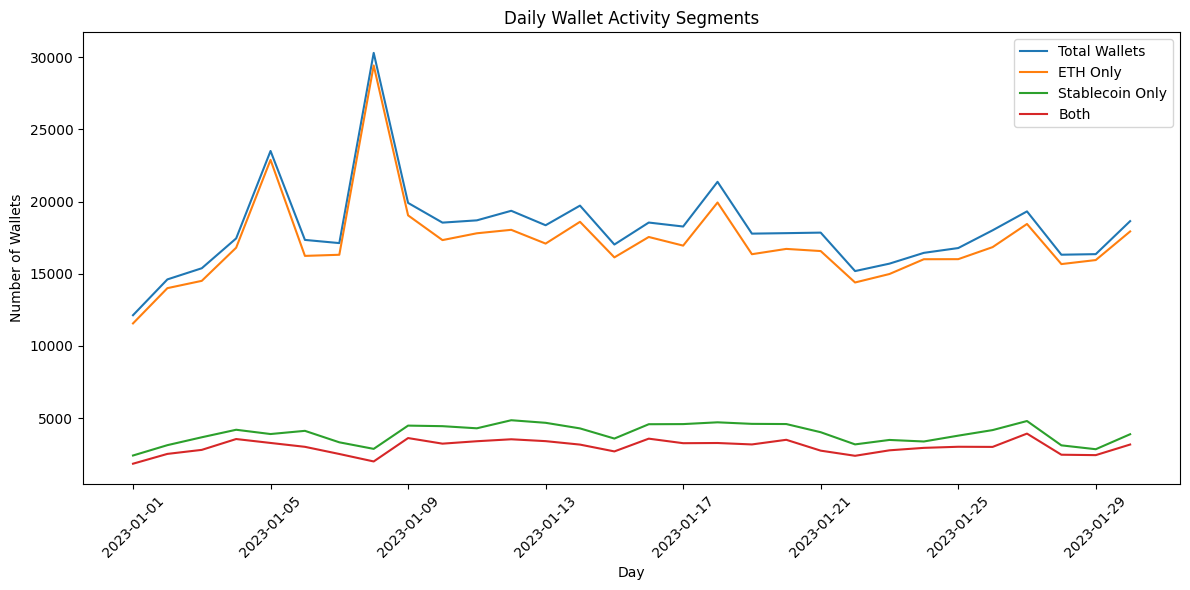

In [8]:
plt.figure(figsize=(12,6))
sns.lineplot(data=daily_summary, x='day', y='total_wallets', label='Total Wallets')
sns.lineplot(data=daily_summary, x='day', y='eth_only_wallets', label='ETH Only')
sns.lineplot(data=daily_summary, x='day', y='stablecoin_only_wallets', label='Stablecoin Only')
sns.lineplot(data=daily_summary, x='day', y='both_wallets', label='Both')
plt.xticks(rotation=45)
plt.title("Daily Wallet Activity Segments")
plt.ylabel("Number of Wallets")
plt.xlabel("Day")
plt.legend()
plt.tight_layout()
plt.show()


## Analysis of Daily Wallet Activity Segments

### Overview

This line chart displays the **daily counts of Ethereum wallets** segmented by their transaction activity type over January 2023:

- **Total Wallets:** All unique wallets active each day  
- **ETH Only:** Wallets that performed ETH transactions exclusively  
- **Stablecoin Only:** Wallets that performed stablecoin transactions exclusively  
- **Both:** Wallets that conducted both ETH and stablecoin transactions  

---

### Key Observations

1. **Overall Activity Trends:**  
   - Total active wallets fluctuate daily but generally hover between approximately 15,000 and 30,000 wallets.  
   - Noticeable spikes around early January (around Jan 5 and Jan 8), possibly reflecting specific market events or promotions that increased wallet activity.

2. **Dominance of ETH-Only Wallets:**  
   - The ETH-only segment closely tracks the total wallet count, showing it forms the **majority** of active wallets.  
   - This suggests that most users engage primarily with ETH transactions rather than stablecoins or mixed activity.

3. **Stablecoin and Both Wallets:**  
   - Stablecoin-only and both (ETH + stablecoin) wallets are considerably smaller segments, generally below 5,000 wallets daily.  
   - The “both” segment, while smaller, indicates a more **engaged user group** that interacts with multiple asset types, likely representing sophisticated or active traders.

4. **Relative Stability:**  
   - After early January spikes, wallet activity stabilizes, showing typical daily fluctuations but no dramatic trends.  
   - The relative proportions of each segment remain consistent over time, indicating stable user behavior patterns for the month.

---

### Potential Implications

- The **strong presence of ETH-only wallets** implies ETH remains the primary asset for most users. Projects or services focusing on ETH could cater to the largest user base.  
- The **consistent but smaller “both” segment** highlights an opportunity to engage users interested in multi-asset activity, possibly by offering bundled services or incentives.  
- Market events or external factors driving spikes in wallet activity should be further investigated to understand user behavior dynamics.

---

### Suggested Next Steps

- Combine this analysis with **cohort retention** to see if “both” wallet users have higher retention or transaction frequency.  
- Analyze the **transaction volumes** alongside counts to capture value dynamics, not just wallet counts.  
- Explore whether the spikes correlate with **external crypto market events** or platform-specific campaigns.

In [9]:
# Compute first day each wallet appeared
df['first_day'] = df.groupby('wallet')['day'].transform('min')
df['days_since_first'] = (df['day'] - df['first_day']).dt.days

# Create cohort table
cohort_table = df.groupby(['first_day', 'days_since_first']).agg(
    active_wallets=('wallet', 'nunique')
).reset_index()

cohort_table.head()

,first_day,days_since_first,active_wallets
0,2023-01-01,0,12131
1,2023-01-01,1,3517
2,2023-01-01,2,3177
3,2023-01-01,3,3016
4,2023-01-01,4,2866


In [17]:
cohort_matrix = cohort_table.pivot(
    index='first_day',
    columns='days_since_first',
    values='active_wallets'
)

# Ensure it is a proper DataFrame
cohort_matrix = pd.DataFrame(cohort_matrix).fillna(0)

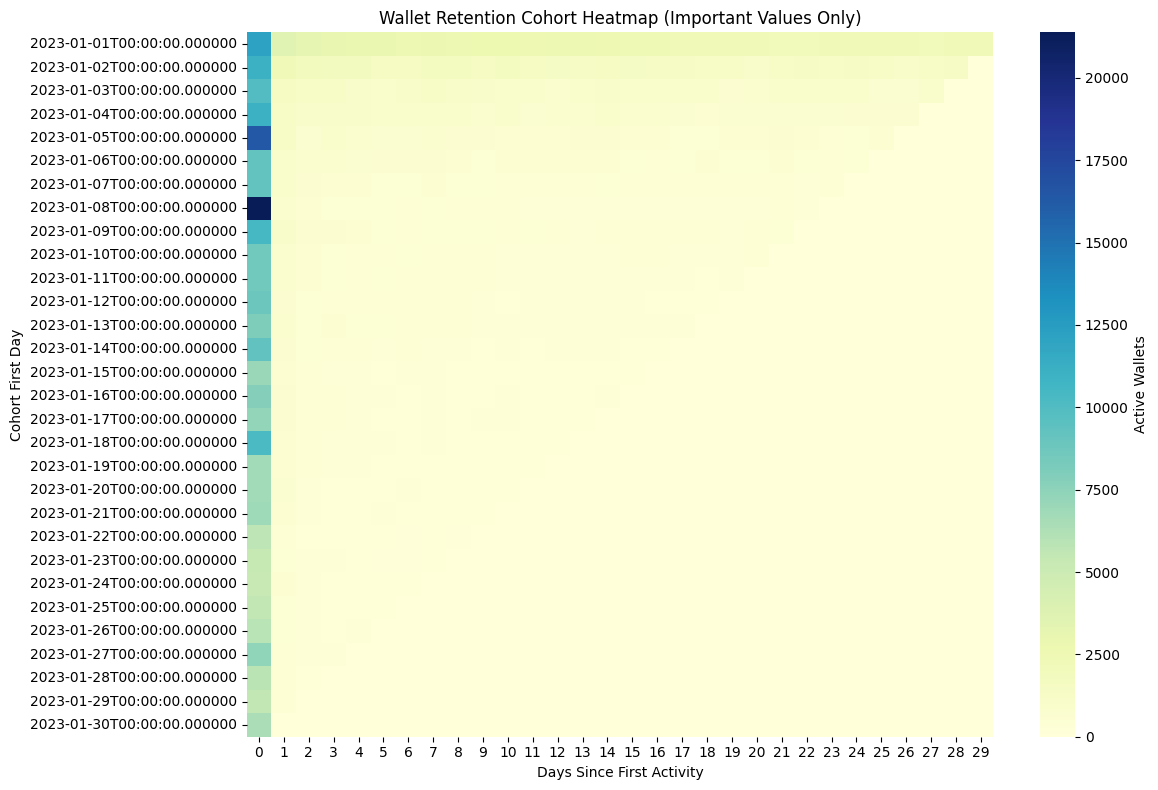

In [24]:
threshold = cohort_matrix.max().max() * 0.5  # annotate top 10% of values
annot_mask = cohort_matrix.where(cohort_matrix > threshold, "") 

plt.figure(figsize=(12,8))
sns.heatmap(
    cohort_matrix,
    # annot=annot_mask,  # only shows important numbers
    fmt="", 
    cmap="YlGnBu",
    cbar_kws={'label': 'Active Wallets'}
)
plt.title("Wallet Retention Cohort Heatmap (Important Values Only)")
plt.ylabel("Cohort First Day")
plt.xlabel("Days Since First Activity")
plt.tight_layout()
plt.show()

## Wallet Retention Cohort Heatmap & Daily Wallet Segmentation Analysis

### Wallet Retention Cohort Heatmap (Important Values Only)

The heatmap visualizes wallet retention by showing the number of active wallets over time since their first activity (cohort day).  

- **Y-axis:** Cohort first activity day (wallets grouped by their start date)  
- **X-axis:** Days since the wallet’s first activity  
- **Color intensity:** Number of active wallets  

**Key insights:**  
- The heatmap is brightest on the left (day 0) indicating high activity on the first day wallets appear.  
- Activity sharply declines as days pass, showing typical retention decay common in user behavior.  
- Only significant values are highlighted to focus on meaningful retention patterns.  
- This retention pattern helps identify how well wallets remain active over time, a critical metric for user engagement in Web3 platforms.

In [27]:
# Create wallet segments
def segment_wallet(row):
    if row['eth_tx_count'] > 0 and row['stablecoin_tx_count'] > 0:
        return 'Both'
    elif row['eth_tx_count'] > 0:
        return 'ETH-only'
    elif row['stablecoin_tx_count'] > 0:
        return 'Stablecoin-only'
    else:
        return 'Inactive'

df['segment'] = df.apply(segment_wallet, axis=1)

# Aggregate daily counts per segment
daily_segments = df.groupby(['day', 'segment']).agg(
    count=('wallet', 'nunique')
).reset_index()

# Pivot for stacked bar
daily_segments_pivot = daily_segments.pivot(index='day', columns='segment', values='count').fillna(0)

# Convert index to string for plotting
daily_segments_pivot.index = daily_segments_pivot.index.astype(str)


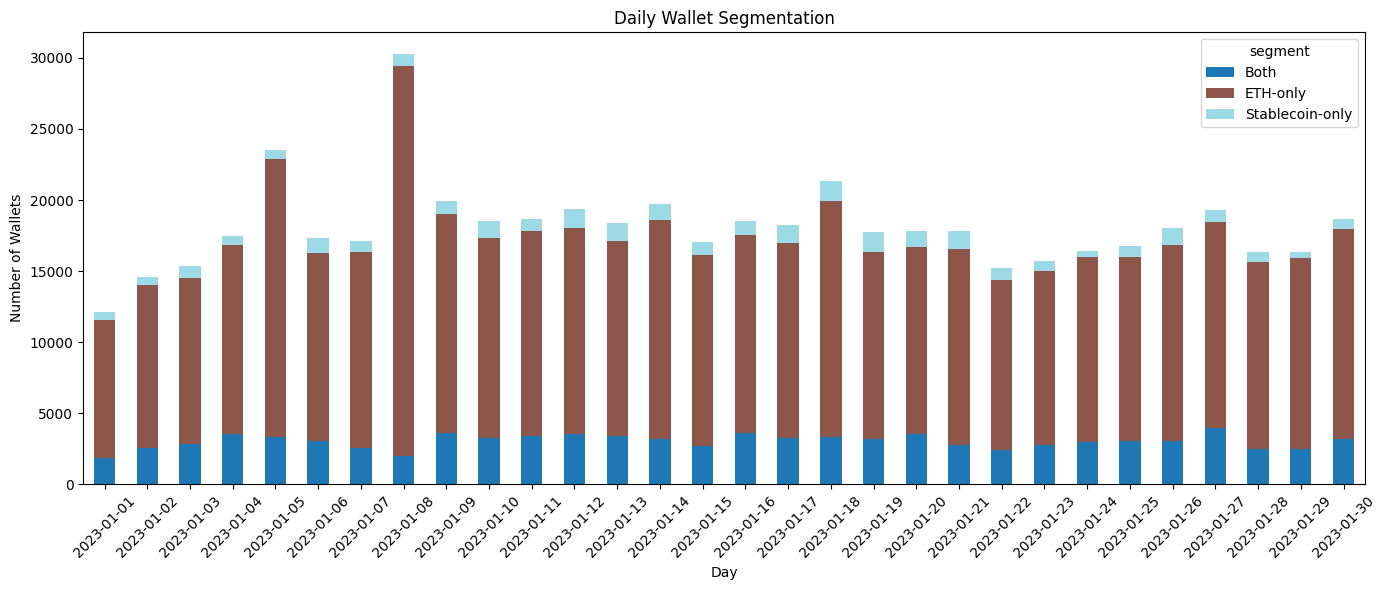

In [28]:
daily_segments_pivot.plot(kind='bar', stacked=True, figsize=(14,6), colormap='tab20')
plt.title("Daily Wallet Segmentation")
plt.ylabel("Number of Wallets")
plt.xlabel("Day")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Daily Wallet Segmentation (Stacked Bar Chart)

This stacked bar chart shows daily counts of wallet segments classified by their transaction behavior:

- **Both:** Wallets with both ETH and stablecoin transactions  
- **ETH-only:** Wallets with only ETH transactions  
- **Stablecoin-only:** Wallets with only stablecoin transactions  

**Observations:**  
- The majority of wallets fall into the ETH-only category, shown as the largest portion of the bars.  
- The “Both” and “Stablecoin-only” segments are smaller but consistently present, indicating diverse user engagement levels.  
- There are clear daily fluctuations in wallet activity, reflecting typical usage patterns and possibly external market factors.

---

### Implications & Next Steps

- The retention heatmap suggests wallet activity drops quickly after initial engagement, highlighting a need to improve long-term user retention.  
- Segmentation reveals the dominant user behavior (ETH-only) and opportunities to engage multi-asset users (“Both” segment).  
- Combining retention data with segmentation insights can guide targeted marketing or product strategies to increase wallet activity and loyalty.  
- Further analysis could explore transaction volume, wallet lifetime value, or impact of specific events on retention and segmentation.

---

This combined analysis provides a foundational understanding of wallet behavior patterns in your Web3 dataset, essential for informed decision-making and strategic growth.
